# Heart Disease Statistics Group Final Report 

## Authors: Nicholas Tam, Hanxi Chen, Levi Zeng, Xinyang Deng

## Group: 4

## 1. Introduction
### 1.1. Background Information
There are numerous studies that have indicated strong associations of coronary heart disease with a wide variety of factors, including age and sex (Lloyd-Jones, Larson, Beiser, Levy, 1999), blood pressure (Lawes, Bennett, Lewington, Rodgers, 2003), and serum cholesterol level (Law, Wald, Thompson, 1994). However, given that the majority of the given factors have significant associations with one another, such as cholesterol level with age and sex (Beckett, N., Nunes, M., & Bulpitt, C., 2000), along with the sheer quantity of potential risk factors (Hajar, 2017), it is unclear how these factors could be combined to model and predict the diagnosis of coronary heart disease.

### 1.2. Dataset and Project Question
For our research project, we have selected datasets containing processed angiography data on patients in various clinics in 1988, applying a probability model derived from test results of 303 patients at the Cleveland Clinic in Cleveland, Ohio to generate and estimate results for the diagnosis of coronary heart disease (Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R., 1989). The datasets include the following patients undergoing angiography: 
- 303 patients at the Cleveland Clinic in Cleveland, Ohio (Original dataset for model) 
- 425 patients at the Hungarian Institute of Cardiology in Budapest, Hungary
- 200 patients at the Veterans Administration Medical Center in Long Beach, California 
- 143 patients from the University Hospitals in Zurich and Basel, Switzerland

These datasets were retrieved from the [Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease) dataset from UCI machine learning repository, and converted from .data files to CSV files with Excel. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: 

In [1]:
myTable <- data.frame(
  Variable = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"),
  Definition = c("Age", "Sex", "Chest pain type", "Resting blood pressure on admission to hospital", "Serum cholesterol", "Presence of high blood sugar", "Resting electrocardiographic results", "Maximum heart rate achieved", "Exercise induced angina", "ST depression induced by exercise relative to rest", "Slope of the peak exercise ST segment", "Number of major vessels coloured by fluoroscopy", "Presence of defect", "Diagnosis of heart disease"),
  Type = c("Numerical", "Categorical", "Categorical", "Numerical", "Numerical", "Categorical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Numerical", "Categorical", "Categorical"),
  Unit = c("Years", "N/A", "N/A", "mmHg", "mg/dl", "N/A", "N/A", "BPM", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"),
  Categories = c("N/A", "0: Female; 1: Male", "1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic", "N/A", "N/A", "0: False; 1: True", "0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria", "N/A", "0: No; 1: Yes", "N/A", "1: Upsloping; 2: Flat; 3: Downsloping", "Range from 1-3", "3: Normal; 6: Fixed defect; 7: Reversible defect", "0: < 50% diameter narrowing; 1+: > 50% diameter narrowing"),
  AnyMissingValues = c("No", "No", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No")
)
myTable

Variable,Definition,Type,Unit,Categories,AnyMissingValues
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
age,Age,Numerical,Years,N/A,No
sex,Sex,Categorical,N/A,0: Female; 1: Male,No
cp,Chest pain type,Categorical,N/A,1: Typical angina; 2: Atypical angina; 3: Non-anginal pain; 4: Asymptomatic,No
trestbps,Resting blood pressure on admission to hospital,Numerical,mmHg,N/A,Yes
chol,Serum cholesterol,Numerical,mg/dl,N/A,Yes
fbs,Presence of high blood sugar,Categorical,N/A,0: False; 1: True,Yes
restecg,Resting electrocardiographic results,Categorical,N/A,0: Normal; 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria,Yes
thalach,Maximum heart rate achieved,Numerical,BPM,N/A,Yes
exang,Exercise induced angina,Categorical,N/A,0: No; 1: Yes,Yes


Our project question is:

#### “Given the sample data for angiography patients, what model would be most effective in predicting each patient’s diagnosis?”

Our analysis will involve the development of a predictive model to estimate the likelihood of angiographic coronary disease based on these variables. Additionally, we will explore regional variations and demographic influences on heart disease risk. This research question is primarily focused on both predictions, as we seek to generate a predictive model given the provided data to estimate diagnoses of new observations. Inference will also be required to a lesser extent, as we aim to gain insights into the factors influencing the likelihood of coronary disease diagnosis in different locations and demographic groups. 

## 2. Preliminary Results

### 2.1. Loading relevant libraries

In [2]:
# Imports

# install.packages("remotes")
# remotes::install_github("tidymodels/infer")
# install.packages("infer") # Install infer package for use

library(dplyr) # Data manipulation operations
library(gridExtra) # Extensions for grid system
library(tidyverse) # Better presentation of data
library(repr) # String and binary representations of objects for several formats / mime types 
library(lubridate) # Easier date organisation
library(infer) # Bootstrap distribution, confidence interval
library(broom) # Reorganises outputs into tidy tibbles
library(ggplot2) # Provides commands to create complex plots
library(GGally) # Provides correlation between variables
library(tidymodels) # Modelling with training and testing
library(car) # Applied regression tools, including VIF
library(leaps) # Exhaustive search for the best subsets of the variables in x for predicting y in linear regression
library(glmnet) # Regularised regression models
library(mltools) # Regression metrics
library(caret) # Streamline the process for creating predictive models
library(boot) # Allows easy generattion of bootstrap samples of virtually any statistic that they can calculate in R
library(pROC) # Display and analyse ROC curves 
library(MASS) # Support functions and datasets for Venables and Ripley's MASS # WARNING: select() MAY HAVE ISSUES WITH USE IF THIS IS LOADED


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.3     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ gridExtra::combine() masks dplyr::combine()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

── Attaching packages ─────────────────────────────────────

### 2.2. Uploading and merging relevant tables

- Each data set is read separately, then merged into a single dataframe called `total_heart`, as shown in Table 1. 
- Before merging, the `location` column is created, to indicate the differing clinics that the probability model was applied to; the reference level is set to "Cleveland", the clinic the initial model was derived from.
- The `age`, `sex`, `cp`, `trestbps`, `chol`, `thalach`, and `num` columns require a change in data type to be used as intended.
- Due to several datasets either missing most or all data for `fbs`, `oldpeak`, `slope`, `ca` and `thal` columns, the columns have been removed under the assumption that they are irrelevant or are results from the initial model.
- Any patients with "?" for any variables, `trestbps == 0` or `chol == 0` are assumed to be invalid and have been removed.
- The Switzerland dataset has `chol == 0` for all data and as such has been removed.
- Any values of `num >= 1` provide the same result, and thus have been converted to 1.

In [3]:
Cleveland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Cleveland.csv") %>% 
    mutate(location = "Cleveland")
Hungary_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Hungarian.csv") %>% 
    mutate(location = "Hungary")
Switzerland_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project_Final/main/heart%2Bdisease%2BModified/processed_Switzerland.csv") %>% 
    mutate(location = "Switzerland")
California_heart <- read.csv("https://raw.githubusercontent.com/Nick-2003/STAT-301-Group_4-Project/main/heart%2Bdisease%2BModified/processed_VA.csv") %>% 
    mutate(location = "California")
# head(California_heart)
total_heart <- rbind(Cleveland_heart, Hungary_heart, Switzerland_heart, California_heart) %>% 
    dplyr::select(location, age, sex, cp, trestbps, chol, restecg, thalach, exang, num) %>% 
    filter(!(location == '?' | age == '?' | sex == '?' | cp == '?' | trestbps == '?' | trestbps == '0' | chol == '?' | chol == '0' | restecg == '?' | thalach == '?' | num == '?')) %>% 
    mutate(num = ifelse(num >= 1, 1, num))  %>% 
    # transform(sex = as.character(as.factor(sex)), cp = as.character(as.factor(cp)), trestbps = as.double(as.factor(trestbps)), chol = as.double(as.factor(chol)), thalach = as.double(as.factor(thalach))) 
    transform(sex = as.factor(sex), cp = as.factor(cp), trestbps = as.double(trestbps), chol = as.double(chol), restecg = as.factor(restecg), thalach = as.double(thalach), num = as.factor(num)) 
# %>% 
total_heart$location <- factor(total_heart$location) %>% 
    relevel(total_heart$location, ref = "Cleveland")

head(total_heart)
tail(total_heart)

,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
1,Cleveland,63,1,1,145,233,2,150,0,0
2,Cleveland,67,1,4,160,286,2,108,1,1
3,Cleveland,67,1,4,120,229,2,129,1,1
4,Cleveland,37,1,3,130,250,0,187,0,0
5,Cleveland,41,0,2,130,204,2,172,0,0
6,Cleveland,56,1,2,120,236,0,178,0,0


,location,age,sex,cp,trestbps,chol,restecg,thalach,exang,num
,<fct>,<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<fct>
669,California,53,1,4,144,300,1,128,1,1
670,California,62,1,4,158,170,1,138,1,1
671,California,46,1,4,134,310,0,126,0,1
672,California,54,0,4,127,333,1,154,0,1
673,California,55,1,4,122,223,1,100,0,1
674,California,62,1,2,120,254,2,93,1,1


### 2.3. Exploratory Data Analysis
- Since our research question is predictive (as discussed above), and the response variable is categorical, logistic regression will be applied in future model fittings. 
- For our exploratory data analysis, we want to check if there is a clear relationship between the predictors and the response variable `num`. 

#### 2.3.1. Barplot for Categorical Variables
- Bar plots display the distribution of categorical predictor variables `location`, `sex`, `cp`, and `restecg`, with the coloured proportion representing the proportion of response levels at that level of predictor. 
- Allows us to assess whether the prevalence of coronary heart disease varies significantly between different predictor variable levels.
- `location`: Significantly higher proportion of observations from California diagnosed with coronary heart disease compared to other locations.
- `sex`: Significantly higher proportion of males diagnosed with heart disease compared to females.
- `cp`: Significantly higher proportion of people with asymptomatic chest pain diagnosed with coronary heart disease compared to those with other types of chest pain, which is consistent with professional knowledge. 
- `restecg`: No significant difference in proportions of diagnoses between each type of result.
- `location`, `sex` and `cp` are more likely to be relevant predictors than `restecg`.

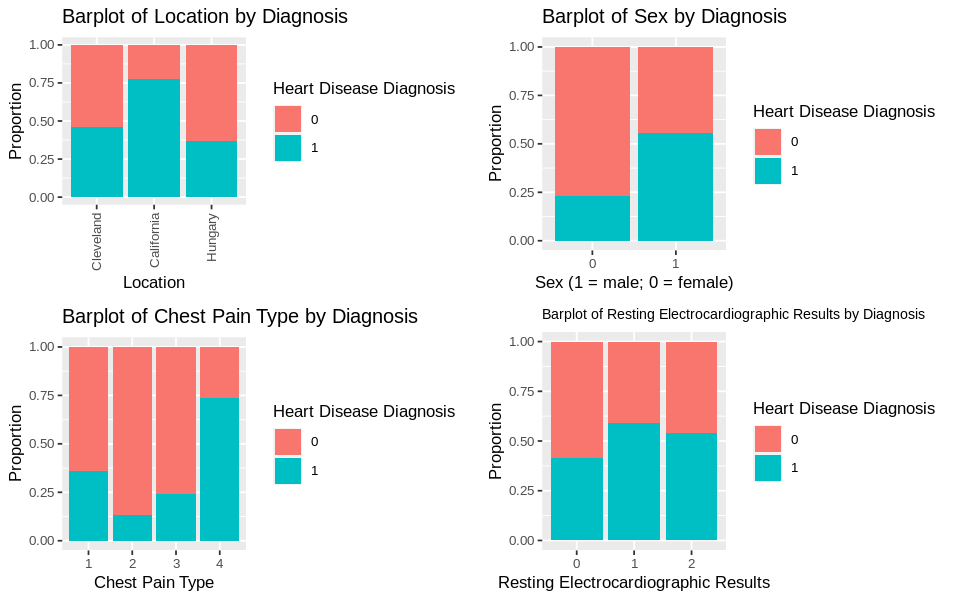

In [27]:
options(repr.plot.width = 8, repr.plot.height = 5)

location_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = location, fill = num), position = "fill") +
    labs(title = "Barplot of Location by Diagnosis", 
         x = "Location", 
         y = "Proportion", 
         fill = "Heart Disease Diagnosis"
        ) + 
    theme(text = element_text(size = 10), axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1), )

sex_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = as.factor(sex), fill = num), position = "fill") +
    labs(title = "Barplot of Sex by Diagnosis",
       x = "Sex (1 = male; 0 = female)",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 10))

cp_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = cp, fill = num), position = "fill") +
    labs(title = "Barplot of Chest Pain Type by Diagnosis",
       x = "Chest Pain Type",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(text = element_text(size = 10))

restecg_plot <- total_heart %>%
    ggplot() +
    geom_bar(aes(x = restecg, fill = num), position = "fill") +
    labs(title = "Barplot of Resting Electrocardiographic Results by Diagnosis",
       x = "Resting Electrocardiographic Results",
       y = "Proportion",
       fill = "Heart Disease Diagnosis") +
    theme(plot.title = element_text(size = 8.5), text = element_text(size = 10))

grid.arrange(location_plot, sex_plot, cp_plot, restecg_plot)

#### 2.3.2. Boxplot for Numerical Variables
- Box plots 

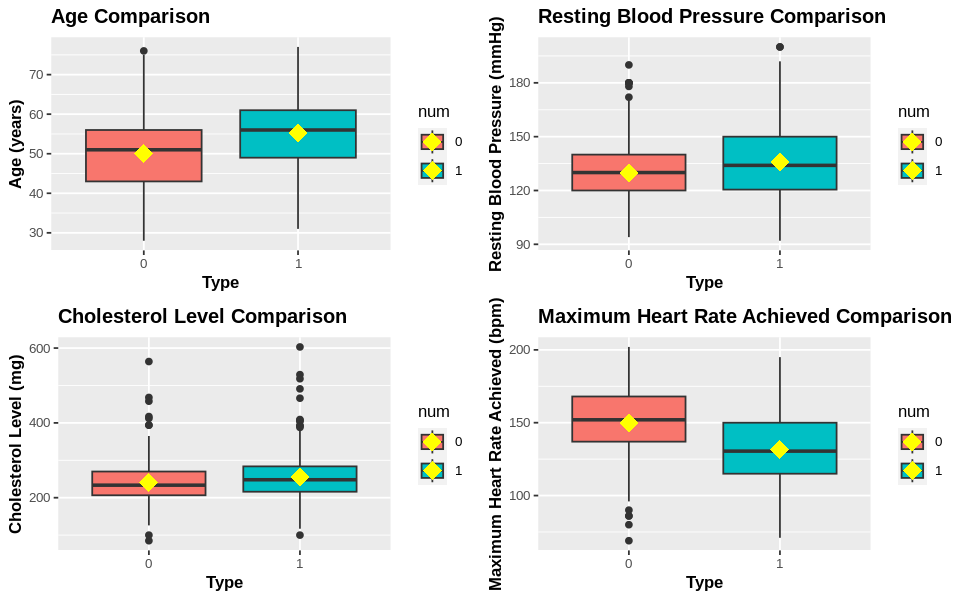

In [20]:
options(repr.plot.width = 8, repr.plot.height = 5)

age_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, age, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Age Comparison") +
    xlab("Type") +
    ylab("Age (years)") +
    stat_summary(aes(num, age, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

trestbps_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, trestbps, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Resting Blood Pressure Comparison") +
    xlab("Type") +
    ylab("Resting Blood Pressure (mmHg)") +
    stat_summary(aes(num, trestbps, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

chol_num_boxplots <- total_heart %>%
    filter(location != "Switzerland") %>%
    ggplot() +
    geom_boxplot(aes(num, chol, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Cholesterol Level Comparison") +
    xlab("Type") +
    ylab("Cholesterol Level (mg)") +
    stat_summary(aes(num, chol, fill = num),
    fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
)

thalach_num_boxplots <- total_heart %>%
    ggplot() +
    geom_boxplot(aes(num, thalach, fill = num)) +
    theme(
        text = element_text(size = 10),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    ) +
    ggtitle("Maximum Heart Rate Achieved Comparison") +
    xlab("Type") +
    ylab("Maximum Heart Rate Achieved (bpm)") +
    stat_summary(aes(num, thalach, fill = num),
                 fun = mean, colour = "yellow", geom = "point", shape = 18, size = 5
                )

grid.arrange(age_num_boxplots, trestbps_num_boxplots, chol_num_boxplots, thalach_num_boxplots)

#### 2.3.3. Variance Inflation Factor (VIF) on variables
- VIF for each variable is calculated to test for multicollinearity, which could make it difficult to interpret coefficients, and it reduces the power of the model to identify statistically significant independent variables.
- `GVIF..1..2.Df..` is used for comparison due to different degrees of freedom for some variables.
- Horizontal line of VIF = 5 to indicate severe correlation of a variable with other variables; any variables with VIF > 5 are to be removed to reduce multicollinearity in the model.
- `GVIF..1..2.Df..` for all variables are significantly lower than 5, so multicollinearity between all variables is relatively low, thus no variables need to be removed

,GVIF,Df,GVIF..1..2.Df..,variable
,<dbl>,<dbl>,<dbl>,<chr>
location,2.409002,2,1.245831,location
age,1.501386,1,1.225311,age
sex,1.126742,1,1.061481,sex
cp,1.200695,3,1.030953,cp
trestbps,1.107297,1,1.052282,trestbps
chol,1.080300,1,1.039375,chol
restecg,1.631578,2,1.130191,restecg
thalach,1.497189,1,1.223597,thalach
exang,1.115779,1,1.056304,exang


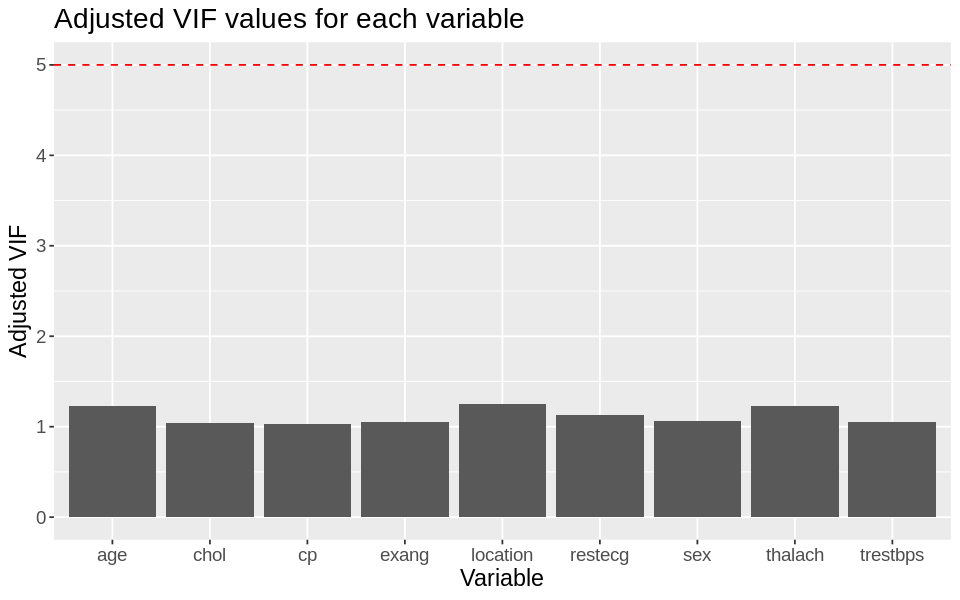

In [28]:
options(repr.plot.width = 8, repr.plot.height = 5)

VIF_prep <- glm(num ~ ., data = total_heart, family = binomial)
heart_MLR_add_inter_VIF <- data.frame(vif(VIF_prep))
# heart_MLR_add_inter_VIF <- vif(VIF_prep)
heart_MLR_add_inter_VIF$variable <- c("location", "age", "sex", "cp", "trestbps", "chol", "restecg", "thalach", "exang") 
heart_MLR_add_inter_VIF

# VIF graph
heart_MLR_add_inter_VIF_vis <- ggplot(heart_MLR_add_inter_VIF, aes(x = variable, y = GVIF..1..2.Df..)) +
    geom_bar(stat = "identity") +
    ggtitle("Adjusted VIF values for each variable") +
    labs(x = "Variable", y = "Adjusted VIF") + 
    geom_hline(yintercept = 5, linetype = "dashed", color = "red") +
    theme(text = element_text(size = 14))
heart_MLR_add_inter_VIF_vis

#### 2.3.4. Melted Correlation Table for Continuous Variables 
- 

In [41]:
corr_matrix_heart <- total_heart %>%  
    dplyr::select(age, trestbps, chol, thalach) %>% 
    cor() %>%
    as.data.frame() %>%
    rownames_to_column("var1") %>%
    pivot_longer(-var1, names_to = "var2", values_to = "corr")
# head(corr_matrix_heart)

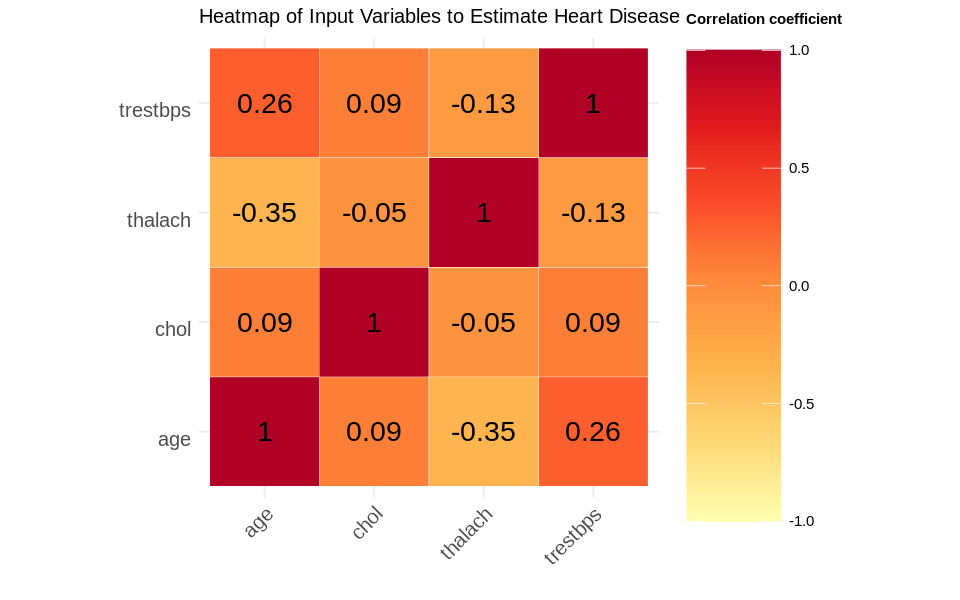

In [40]:
options(repr.plot.width = 8, repr.plot.height = 5)

plot_corr_matrix_heart <- corr_matrix_heart %>%
    ggplot(aes(var1, var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation coefficient \n",
        palette = "YlOrRd",
        direction = 1, limits = c(-1, 1)
    ) +
    labs(x = "", y = "") +
    ggtitle("Heatmap of Input Variables to Estimate Heart Disease") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(
            angle = 45, vjust = 1,
            size = 12, hjust = 1
        ),
        axis.text.y = element_text(
            vjust = 1,
            size = 12, hjust = 1
        ),
        legend.title = element_text(size = 9, face = "bold"), 
        legend.text = element_text(size = 9), 
        legend.key.size = unit(2, "cm"),
        plot.title = element_text(size = 12)
    ) + 
    coord_fixed() + 
    geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_heart

## 3. Methods and Plan

The dataset contains measurements for coronary heart disease diagnosis in separate locations, and the VIF values for all explanatory variables are relatively low, allowing for variations in diagnosis due to potential confounding variables being accounted for.

### 3.1. 

## 4. Discussion 
### 4.1. 

## References
- Lloyd-Jones, D. M., Larson, M. G., Beiser, A., & Levy, D. (1999, February 19). Lifetime risk of developing coronary heart disease. The Lancet. https://www.sciencedirect.com/science/article/pii/S0140673698102799?via%3Dihub 
- Lawes, C. M. M., Bennett, D. A., Lewington, S., & Rodgers, A. (2003, January 22). Blood pressure and coronary heart disease: A review of the evidence. Seminars in Vascular Medicine. https://www.thieme-connect.com/products/ejournals/html/10.1055/s-2002-36765 
- Law, M. R., Wald, N. J., & Thompson, S. G. (1994, February 5). By how much and how quickly does reduction in serum cholesterol concentration lower risk of ischaemic heart disease?. The BMJ. https://www.bmj.com/content/308/6925/367.full 
- Beckett, N., Nunes, M., & Bulpitt, C. (2000). Is it advantageous to lower cholesterol in the elderly hypertensive?. Cardiovascular drugs and therapy, 14(4), 397–405. https://doi.org/10.1023/a:1007812232328 
- Hajar R. (2017). Risk Factors for Coronary Artery Disease: Historical Perspectives. Heart views : the official journal of the Gulf Heart Association, 18(3), 109–114. https://doi.org/10.4103/HEARTVIEWS.HEARTVIEWS_106_17 